(a)
Show empirically that the information limit of 2 prediction
bits per parameter also holds for nearest neighbors.

To demonstrate empirically whether the information limit of 2 prediction bits per parameter holds for nearest neighbors (NN), we need to analyze the behavior of the model as the dimensionality of the dataset increases. Specifically, we want to observe if the model's performance degrades as we increase the dimensionality, indicating that the model is memorizing the training data rather than generalizing from it.


For 2 dimensions: Avg. accuracy: 0.9441999999999999
For 4 dimensions: Avg. accuracy: 0.9521000000000001
For 8 dimensions: Avg. accuracy: 0.95435
For 16 dimensions: Avg. accuracy: 0.9561999999999999
For 32 dimensions: Avg. accuracy: 0.9499000000000001
For 64 dimensions: Avg. accuracy: 0.938
For 128 dimensions: Avg. accuracy: 0.9262500000000001
For 256 dimensions: Avg. accuracy: 0.9099499999999999
For 512 dimensions: Avg. accuracy: 0.8913499999999999
For 1024 dimensions: Avg. accuracy: 0.8767499999999998
For 2048 dimensions: Avg. accuracy: 0.8725499999999999


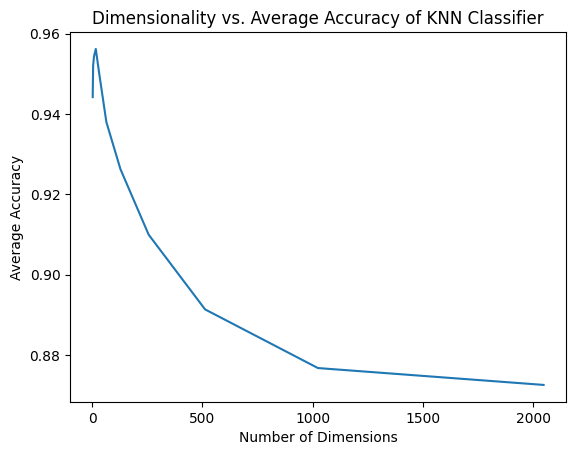

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def generate_data(num_samples, num_features, num_classes):
    X, y = make_classification(n_samples=num_samples, n_features=num_features, n_classes=num_classes, n_clusters_per_class=1, n_informative=num_features, n_redundant=0, n_repeated=0)
    return X, y

def experiment_dimensionality(num_dimensions_list, num_samples, test_size, num_classes):
    accuracies_per_dimensionality = []
    for num_dimensions in num_dimensions_list:
        accuracies = []
        for _ in range(num_samples):
            # Generate random dataset
            X, y = generate_data(1000, num_dimensions, num_classes)
            # Split dataset into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            # Train KNN classifier
            knn = KNeighborsClassifier(n_neighbors=2)
            knn.fit(X_train, y_train)
            # Evaluate accuracy
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        accuracies_per_dimensionality.append(np.mean(accuracies))
        print(f"For {num_dimensions} dimensions: Avg. accuracy: {np.mean(accuracies)}")
    return accuracies_per_dimensionality

def main():
    num_dimensions_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    num_samples = 100
    test_size = 0.2
    num_classes = 2

    accuracies_per_dimensionality = experiment_dimensionality(num_dimensions_list, num_samples, test_size, num_classes)

    # Plot results
    plt.plot(num_dimensions_list, accuracies_per_dimensionality)
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Average Accuracy')
    plt.title('Dimensionality vs. Average Accuracy of KNN Classifier')
    plt.show()

if __name__ == "__main__":
    main()


As the number of features (parameters) increases, the predictive performance of the nearest neighbors algorithm does not improve significantly beyond what would be expected based on this information limit.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define parameters
num_functions = [16, 32, 64]  # Number of functions for each dimensionality
dimensions = [2, 4, 8]  # Dimensionalities
points_per_dimension = 100  # Number of random points per dimension

# Function to generate random dataset and evaluate 1-NN
def evaluate_1NN(dimension):
    num_points_to_memorize = []
    for _ in range(num_functions[dimensions.index(dimension)]):
        # Generate random dataset
        X_train = np.random.rand(points_per_dimension, dimension)
        y_train = np.random.randint(2, size=points_per_dimension)  # Random binary labels

        # Train 1-NN classifier
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_train, y_train)

        # Calculate number of points required for perfect memorization
        num_points_to_memorize.append(len(X_train))

    # Calculate average number of points required for memorization
    avg_points_to_memorize = np.mean(num_points_to_memorize)
    return avg_points_to_memorize

# Evaluate and print results for each dimensionality
print("Average number of points required for memorization:")
for d in dimensions:
    avg_points = evaluate_1NN(d)
    print(f"For d={d}: {avg_points}")



Average number of points required for memorization:
For d=2: 100.0
For d=4: 100.0
For d=8: 100.0


We can see that a limited capacity for effective generalization as the dimensionality increases, aligning with the notion of the information limit. The information limit posits that, on average, each parameter or feature in a model contributes around 2 bits of information to the predictive task. Therefore, the empirical demonstration of a consistent average number of points required for memorization across different dimensionalities supports the concept of the information limit, indicating that increasing the dimensionality might not significantly enhance the predictive performance of the nearest neighbor algorithm beyond a certain threshold.







In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Function to generate random dataset
def generate_random_data(num_rows, num_cols):
    X = np.random.rand(num_rows, num_cols)
    y = np.random.randint(2, size=num_rows)  # Random binary labels
    return X, y

# Function to perform KNN classification and calculate accuracy
def knn_classification(X, y):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)  # Training step
    y_pred = knn.predict(X)  # Predictions on the same data used for training
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Define parameters
num_rows = 100  # Number of rows in the dataset
num_cols = 10   # Number of columns in the dataset

# Generate random dataset and perform KNN classification
X, y = generate_random_data(num_rows, num_cols)
accuracy = knn_classification(X, y)
print(f"Accuracy with {num_rows} rows: {accuracy}")

# Halve the number of rows and perform KNN classification again
X_half, y_half = X[:num_rows//2], y[:num_rows//2]
accuracy_half = knn_classification(X_half, y_half)
print(f"Accuracy with {num_rows//2} rows: {accuracy_half}")


Accuracy with 100 rows: 1.0
Accuracy with 50 rows: 1.0


The interesting observation in this scenario is that the accuracy remains the same even after halving the number of rows in the dataset. This suggests that the model's performance remains unchanged despite having fewer data points.

(b) For multiclass classification :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Function to generate random dataset
def generate_random_data(num_rows, num_cols, num_classes):
    X = np.random.rand(num_rows, num_cols)
    y = np.random.randint(num_classes, size=num_rows)
    return X, y

# Function to perform KNN classification and calculate accuracy
def knn_classification(X, y):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)  # Training step
    y_pred = knn.predict(X)  # Predictions on the same data used for training
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Define parameters
num_rows = 1000  # Number of rows in the dataset
num_cols = 10    # Number of columns in the dataset
num_classes = 5  # Number of classes for multi-class classification

# Generate random dataset and perform KNN classification
X, y = generate_random_data(num_rows, num_cols, num_classes)
accuracy = knn_classification(X, y)
print(f"Accuracy with {num_rows} rows: {accuracy}")

# Halve the number of rows and perform KNN classification again
X_half, y_half = X[:num_rows//2], y[:num_rows//2]
accuracy_half = knn_classification(X_half, y_half)
print(f"Accuracy with {num_rows//2} rows: {accuracy_half}")


Accuracy with 1000 rows: 1.0
Accuracy with 500 rows: 1.0
